In [ ]:
## Data Collection Process

1. **Importing Libraries**: 
    - The first step was to import the necessary libraries such as `pandas`, `seaborn`, `BeautifulSoup`, `matplotlib.pyplot`, `requests`, `time`, and `re`. These libraries were essential for data manipulation, visualization, web scraping, and handling HTTP requests.

2. **Defining Categories**:
    - A dictionary named `categories` was created to store the product categories (e.g., Phones, Laptops, Tablets) and their corresponding base URLs from the Jumia website. This allowed for easy iteration over the categories during the scraping process.

3. **Defining the Scraping Function**:
    - A function named `scrape_products` was defined to extract product details from the Jumia website. This function:
      - Loops through the first 10 pages of each category.
      - Sends HTTP GET requests to fetch the HTML content of the pages.
      - Parses the HTML using `BeautifulSoup` to extract product details such as name, price, old price, discount, rating, review count, and product type.
      - Appends the extracted details into a list of dictionaries.

4. **Scraping the Data**:
    - Using the `scrape_products` function, data for all categories was scraped by iterating over the `categories` dictionary. The scraped data was stored in a list named `data`.

5. **Saving the Data**:
    - The scraped data was converted into a pandas DataFrame for easier manipulation and analysis.
    - The DataFrame was then saved as a CSV file named `jumia_products.csv` for future use and reference.

In [1]:
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import requests
import time
import re

In [43]:
# Define categories and their URLs
categories = {
    "Phones":"https://www.jumia.co.ke/catalog/?q=phones&page=",
    "Laptops": "https://www.jumia.co.ke/catalog/?q=laptop&page=",
    "Tablets": "https://www.jumia.co.ke/catalog/?q=tablets&page="
    
   
}

In [ ]:
# Function to extract product details
def scrape_products(category, base_url, max_pages=10):
    products = []
    
    for page in range(1, max_pages + 1):
        url = f"{base_url}{page}"
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Failed to retrieve {category} data on page {page}")
            continue
        
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract product details
        for item in soup.find_all('article', class_='prd _fb col c-prd'):
            name = item.find('h3', class_='name')
            price = item.find('div', class_='prc')
            old_price = item.find('div', class_='old')
            discount = item.find('div', class_='bdg _dsct')
            rating = item.find('div', class_='stars _s')
            review_count = item.find('div', class_='rev')
            
            products.append({
                "Name": name.text.strip() if name else None,
                "Brand": name.text.split()[0] if name else None,
                "Price": price.text.strip() if price else None,
                "Old Price": old_price.text.strip() if old_price else None,
                "Discount": discount.text.strip() if discount else None,
                "Rating": rating.get('aria-label', None) if rating else None,
                "Review Count": review_count.text.strip() if review_count else None,
                "Type of Product": category
            })
        
        print(f"Scraped {category} - Page {page}")
        time.sleep(2)  # Avoid getting blocked
    
    return products

In [46]:
# Scrape all categories
data = []
for category, url in categories.items():
    print(f"Scraping {category}...")
    data.extend(scrape_products(category, url))
    time.sleep(2)  # Avoid getting blocked by the website
print('Congratulations!Scrapping Complete!!')

Scraping Phones...
Scraped Phones - Page 1
Scraped Phones - Page 2
Scraped Phones - Page 3
Scraped Phones - Page 4
Scraped Phones - Page 5
Scraped Phones - Page 6
Scraped Phones - Page 7
Scraped Phones - Page 8
Scraped Phones - Page 9
Scraped Phones - Page 10
Scraping Laptops...
Scraped Laptops - Page 1
Scraped Laptops - Page 2
Scraped Laptops - Page 3
Scraped Laptops - Page 4
Scraped Laptops - Page 5
Scraped Laptops - Page 6
Scraped Laptops - Page 7
Scraped Laptops - Page 8
Scraped Laptops - Page 9
Scraped Laptops - Page 10
Scraping Tablets...
Scraped Tablets - Page 1
Scraped Tablets - Page 2
Scraped Tablets - Page 3
Scraped Tablets - Page 4
Scraped Tablets - Page 5
Scraped Tablets - Page 6
Scraped Tablets - Page 7
Scraped Tablets - Page 8
Scraped Tablets - Page 9
Scraped Tablets - Page 10
Congratulations!Scrapping Complete!!


In [209]:
# Convert to DataFrame and save as CSV
df = pd.DataFrame(data)
df.to_csv("jumia_products.csv", index=False)
print("Scraping completed! Data saved to jumia_products.csv")

Scraping completed! Data saved to jumia_products.csv


In [210]:
df=pd.read_csv('jumia_products.csv')
df.head(1000)

,Name,Brand,Price,Old Price,Discount,Rating,Review Count,Type of Product
0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",Oking,KSh 690,KSh 839,NaN,NaN,4.4 out of 5(126),Phones
1,"VILLAON V101 1.77"" Kabambe, Wireless FM, Camer...",VILLAON,KSh 675,KSh 852,NaN,NaN,4 out of 5(586),Phones
2,"Samsung A05, 6.7"", 4GB RAM + 64GB, 5000mAh, Bl...",Samsung,"KSh 10,199","KSh 12,516",NaN,NaN,4.2 out of 5(115),Phones
3,"Infinix Smart 8 6.6"" HD, 2GB RAM + 64GB , Andr...",Infinix,"KSh 8,499","KSh 13,999",NaN,NaN,4 out of 5(56),Phones
4,XIAOMI Redmi 14C 6.88'' 4GB 128GB Android 14 D...,XIAOMI,"KSh 12,399","KSh 25,000",NaN,NaN,3.9 out of 5(152),Phones
...,...,...,...,...,...,...,...,...
995,Bebe KIDS STUDY TABLETS 64GB/4GB UNICORN EDITION,Bebe,"KSh 8,750",NaN,NaN,NaN,NaN,Tablets
996,LCD WRITING KIDS EDUCATIONAL TABLET + FREE CASE,LCD,"KSh 1,150 - KSh 1,250","KSh 1,150 - KSh 1,400",NaN,NaN,4.3 out of 5(7),Tablets
997,Modio KIDS STUDY TABLETS 6GB/256GB- SIMCARD SLOT,Modio,"KSh 11,999","KSh 15,000",NaN,NaN,NaN,Tablets
998,Wacom Intuos Small Bluetooth Black Digital Dr...,Wacom,"KSh 30,201","KSh 33,790",NaN,NaN,NaN,Tablets


In [211]:
df.count().sum()

np.int64(6620)

In [212]:
print(df.shape)

(1200, 8)


In [213]:
df.columns

Index(['Name', 'Brand', 'Price', 'Old Price', 'Discount', 'Rating',
       'Review Count', 'Type of Product'],
      dtype='object')

In [ ]:
## EDA: Cleaning and Feature Extraction

### 1. **Cleaning Product Names**
    - **Objective**: Extract meaningful details from the product names using regex.
    - **Steps**:
      - Extracted the clean name (main product name) by removing specifications and additional details.
      - Extracted storage details (e.g., RAM, ROM, SSD, HDD) using regex patterns.
      - Extracted battery capacity (e.g., 5000mAh) and screen size (e.g., 6.7").
      - Identified product color (e.g., Black, Blue) and other remaining details.
    - **Outcome**: Created new columns such as `Clean Name`, `Storage`, `Battery`, `Screen Size`, `Color`, and `More Details`.

### 2. **Cleaning the `More Details` Column**
    - **Objective**: Remove redundant information from the `More Details` column.
    - **Steps**:
      - Removed details already extracted into other columns (e.g., storage, battery, screen size, color).
      - Cleaned up extra commas and spaces for better readability.

### 3. **Fixing Price Columns**
    - **Objective**: Convert price columns to numerical values for analysis.
    - **Steps**:
      - Removed non-numeric characters (e.g., "KSh") from the `Price` and `Old Price` columns.
      - Converted the cleaned values to integers.
      - Filled missing or zero values in the `Old Price` column with the `Price` value to ensure consistency.

### 4. **Calculating Discounts**
    - **Objective**: Calculate the discount percentage for each product.
    - **Steps**:
      - Used the formula: `((Old Price - Price) / Old Price) * 100`.
      - Rounded the discount values to two decimal places.
      - Ensured that negative discounts were set to 0%.

### 5. **Handling Ratings and Review Counts**
    - **Objective**: Extract numeric values for ratings and review counts.
    - **Steps**:
      - Extracted numeric ratings from text (e.g., "4.4 out of 5").
      - Extracted review counts from text (e.g., "(126)").
      - Filled missing values with 0 for both columns.

### 8. **Renaming Columns**
    - Renamed the `Clean Name` column to `Brand` for better clarity.

### 9. **Final DataFrame**
    - The cleaned DataFrame now includes meaningful columns such as `Brand`, `Storage`, `Battery`, `Screen Size`, `Color`, `Price`, `Old Price`, `Discount`, `Rating`, `Review Count`, and `Type of Product`.
    - This structured data is ready for further analysis and visualization.

In [214]:
#  Data Cleaning and Feature Extraction
def clean_product_name(name):
    if not isinstance(name, str):
        return None, None, None, None, None
    
    # Extract the clean name (first part before any specifications)
    clean_name_match = re.match(r'^[^\d,]+(?:\s\d+[^\d,]*)?', name)
    clean_name = clean_name_match.group(0).strip() if clean_name_match else name.strip()
    
    # Extract storage components
    storage = re.findall(r'(\d+GB\s*(?:RAM|ROM|SSD|HDD)(?:\s*\+\s*\d+GB\s*(?:ROM|SSD|HDD))?)', 
                          name, flags=re.IGNORECASE)
    storage = ', '.join(storage) if storage else "N/A"
    
    # Extract battery capacity
    battery = re.search(r'(\d+mAh)', name)
    battery = battery.group(1) if battery else "N/A"
    
    # Extract screen size
    screen_size = re.search(r'(\d+\.?\d*")', name)
    screen_size = screen_size.group(1) if screen_size else "N/A"
    
    # Remaining details (if any)
    more_details = name.replace(clean_name, '').strip()
    
    # Extract color if present
    color_match = re.search(r'(Black|Blue|Gold|Silver|Green|Red)(?=\s*\(|$)', more_details, re.IGNORECASE)
    color = color_match.group(1).title() if color_match else "N/A"
    
    return clean_name, storage, battery, screen_size, color, more_details

In [215]:
# Apply to DataFrame
df[['Clean Name', 'Storage', 'Battery', 'Screen Size', 'Color', 'More Details', 
    'Price', 'Old Price', 'Discount', 'Rating', 'Review Count', 'Type of Product']] = df.apply(
    lambda row: pd.Series(clean_product_name(row['Name']) + 
                          (row['Price'], row['Old Price'], row['Discount'], 
                           row['Rating'], row['Review Count'], row['Type of Product'])), axis=1)

# Display results
df[['Name', 'Clean Name', 'Storage', 'Battery', 'Screen Size', 'Color', 'More Details', 
    'Price', 'Old Price', 'Discount', 'Rating', 'Review Count', 'Type of Product']].head(5)

,Name,Clean Name,Storage,Battery,Screen Size,Color,More Details,Price,Old Price,Discount,Rating,Review Count,Type of Product
0,"Oking OK310 1.7"" Wireless FM, Bright Torch, 10...",Oking OK,N/A,1000mAh,"1.7""",Black,"310 1.7"" Wireless FM, Bright Torch, 1000mAh, T...",KSh 690,KSh 839,NaN,NaN,4.4 out of 5(126),Phones
1,"VILLAON V101 1.77"" Kabambe, Wireless FM, Camer...",VILLAON V,N/A,1000mAh,"1.77""",N/A,"101 1.77"" Kabambe, Wireless FM, Camera, Bright...",KSh 675,KSh 852,NaN,NaN,4 out of 5(586),Phones
2,"Samsung A05, 6.7"", 4GB RAM + 64GB, 5000mAh, Bl...",Samsung A,4GB RAM,5000mAh,"6.7""",Black,"05, 6.7"", 4GB RAM + 64GB, 5000mAh, Black (1YR...","KSh 10,199","KSh 12,516",NaN,NaN,4.2 out of 5(115),Phones
3,"Infinix Smart 8 6.6"" HD, 2GB RAM + 64GB , Andr...",Infinix Smart,2GB RAM,5000mAh,"6.6""",N/A,"8 6.6"" HD, 2GB RAM + 64GB , Android 13 (Dual S...","KSh 8,499","KSh 13,999",NaN,NaN,4 out of 5(56),Phones
4,XIAOMI Redmi 14C 6.88'' 4GB 128GB Android 14 D...,XIAOMI Redmi,N/A,N/A,N/A,N/A,14C 6.88'' 4GB 128GB Android 14 Dual SIM+GIFTS...,"KSh 12,399","KSh 25,000",NaN,NaN,3.9 out of 5(152),Phones


In [216]:
df.count().sum()

np.int64(13820)

In [217]:
print(df.shape)

(1200, 14)


In [218]:
# Function to clean redundant information from 'More Details'
def clean_more_details(row):
    details = row['More Details']
    for col in ['Storage', 'Battery', 'Screen Size', 'Color']:
        if row[col] != "N/A" and row[col] in details:
            details = details.replace(row[col], '').strip()
    # Remove extra commas and spaces
    details = re.sub(r',\s*,', ',', details)  # Remove consecutive commas
    details = re.sub(r'^\s*,|,\s*$', '', details)  # Remove leading/trailing commas
    return details.strip()

# Apply the cleaning function
df['More Details'] = df.apply(clean_more_details, axis=1)

# Drop the 'Name' column
df.drop(columns=['Name'], inplace=True)

# Rename the DataFrame to clean_df
clean_df = df.copy()

# Display the cleaned DataFrame with additional columns
clean_df = clean_df[['Clean Name', 'Storage', 'Battery', 'Screen Size', 'Color', 'More Details', 
                     'Price', 'Old Price', 'Discount', 'Rating', 'Review Count', 'Type of Product']]



In [219]:
clean_df.count().sum()

np.int64(11420)

In [220]:
clean_df.shape

(1200, 12)

In [221]:
clean_df.tail(5)

,Clean Name,Storage,Battery,Screen Size,Color,More Details,Price,Old Price,Discount,Rating,Review Count,Type of Product
1195,Oraimo Strong Bass Earphone With Mic,N/A,N/A,N/A,N/A,,KSh 189,KSh 199,NaN,NaN,4 out of 5(3),Tablets
1196,Tecno MEGAPAD,"128GB ROM, 4GB RAM",7000mAh,N/A,N/A,"10.1''HD+, 128GB ROM+4GB RAM, (4G LTE), 13MP, ...","KSh 16,999","KSh 20,000",NaN,NaN,NaN,Tablets
1197,Oraimo Strong and deep Pure Bass Earphones (OR...,N/A,N/A,N/A,N/A,,KSh 245,KSh 490,NaN,NaN,NaN,Tablets
1198,Oraimo Heavy Strong Bass Wired Earphones,N/A,N/A,N/A,N/A,,KSh 320,KSh 900,NaN,NaN,NaN,Tablets
1199,Oraimo Slice Link,N/A,10000mAh,N/A,N/A,12W Fast Charge 3 in 1 Portable Power Bank wit...,"KSh 1,999",NaN,NaN,NaN,4.7 out of 5(9),Tablets


In [222]:
clean_df.rename(columns={'Clean Name': 'Brand'}, inplace=True)
clean_df.columns

Index(['Brand', 'Storage', 'Battery', 'Screen Size', 'Color', 'More Details',
       'Price', 'Old Price', 'Discount', 'Rating', 'Review Count',
       'Type of Product'],
      dtype='object')

In [223]:
clean_df.isnull().sum()

Brand                 0
Storage               0
Battery               0
Screen Size           0
Color                 0
More Details          0
Price                 0
Old Price           142
Discount           1200
Rating             1200
Review Count        438
Type of Product       0
dtype: int64

In [224]:
# Convert price columns to numerical values
def clean_price(price):
    if isinstance(price, str):
        price = re.sub(r'[^\d]', '', price)  # Remove non-numeric characters
        return int(price) if price.isdigit() else None
    return price  

clean_df["Price"] = clean_df["Price"].apply(clean_price)
clean_df["Old Price"] = clean_df["Old Price"].apply(clean_price)


In [225]:
# Fix Old Price: If it's 0 or missing, set it to Price so that Discount is 0%
clean_df["Old Price"].fillna(clean_df["Price"], inplace=True)
clean_df.loc[clean_df["Old Price"] == 0, "Old Price"] = clean_df["Price"]

# Calculate discount percentage where old price is available
clean_df["Discount"] = (((clean_df["Old Price"] - clean_df["Price"]) / clean_df["Old Price"]) * 100).round(2)

clean_df.head(5)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9132\1062051460.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df["Old Price"].fillna(clean_df["Price"], inplace=True)


,Brand,Storage,Battery,Screen Size,Color,More Details,Price,Old Price,Discount,Rating,Review Count,Type of Product
0,Oking OK,N/A,1000mAh,"1.7""",Black,"310 Wireless FM, Bright Torch, Tri SIM, 2G - ...",690,839.0,17.76,NaN,4.4 out of 5(126),Phones
1,VILLAON V,N/A,1000mAh,"1.77""",N/A,"101 Kabambe, Wireless FM, Camera, Bright Touc...",675,852.0,20.77,NaN,4 out of 5(586),Phones
2,Samsung A,4GB RAM,5000mAh,"6.7""",Black,"05, + 64GB, (1YR WRTY)",10199,12516.0,18.51,NaN,4.2 out of 5(115),Phones
3,Infinix Smart,2GB RAM,5000mAh,"6.6""",N/A,"8 HD, + 64GB , Android 13 (Dual Sim) , White",8499,13999.0,39.29,NaN,4 out of 5(56),Phones
4,XIAOMI Redmi,N/A,N/A,N/A,N/A,14C 6.88'' 4GB 128GB Android 14 Dual SIM+GIFTS...,12399,25000.0,50.40,NaN,3.9 out of 5(152),Phones


In [226]:
# Extract numeric rating and review count
clean_df["Rating"] = clean_df["Review Count"].str.extract(r'(\d+\.\d+|\d+)').astype(float, errors='ignore')
clean_df["Review Count"] = clean_df["Review Count"].str.extract(r'\((\d+)\)').astype(float, errors='ignore')

# Handle missing values
clean_df.fillna({"Price": 0, "Old Price": 0, "Discount": 0, "Rating": 0, "Review Count": 0}, inplace=True)
clean_df.head(5)


,Brand,Storage,Battery,Screen Size,Color,More Details,Price,Old Price,Discount,Rating,Review Count,Type of Product
0,Oking OK,N/A,1000mAh,"1.7""",Black,"310 Wireless FM, Bright Torch, Tri SIM, 2G - ...",690,839.0,17.76,4.4,126.0,Phones
1,VILLAON V,N/A,1000mAh,"1.77""",N/A,"101 Kabambe, Wireless FM, Camera, Bright Touc...",675,852.0,20.77,4.0,586.0,Phones
2,Samsung A,4GB RAM,5000mAh,"6.7""",Black,"05, + 64GB, (1YR WRTY)",10199,12516.0,18.51,4.2,115.0,Phones
3,Infinix Smart,2GB RAM,5000mAh,"6.6""",N/A,"8 HD, + 64GB , Android 13 (Dual Sim) , White",8499,13999.0,39.29,4.0,56.0,Phones
4,XIAOMI Redmi,N/A,N/A,N/A,N/A,14C 6.88'' 4GB 128GB Android 14 Dual SIM+GIFTS...,12399,25000.0,50.40,3.9,152.0,Phones


In [227]:
clean_df.tail()

,Brand,Storage,Battery,Screen Size,Color,More Details,Price,Old Price,Discount,Rating,Review Count,Type of Product
1195,Oraimo Strong Bass Earphone With Mic,N/A,N/A,N/A,N/A,,189,199.0,5.03,4.0,3.0,Tablets
1196,Tecno MEGAPAD,"128GB ROM, 4GB RAM",7000mAh,N/A,N/A,"10.1''HD+, 128GB ROM+4GB RAM, (4G LTE), 13MP, ...",16999,20000.0,15.00,0.0,0.0,Tablets
1197,Oraimo Strong and deep Pure Bass Earphones (OR...,N/A,N/A,N/A,N/A,,245,490.0,50.00,0.0,0.0,Tablets
1198,Oraimo Heavy Strong Bass Wired Earphones,N/A,N/A,N/A,N/A,,320,900.0,64.44,0.0,0.0,Tablets
1199,Oraimo Slice Link,N/A,10000mAh,N/A,N/A,12W Fast Charge 3 in 1 Portable Power Bank wit...,1999,1999.0,0.00,4.7,9.0,Tablets


In [228]:
clean_df.isnull().sum()


Brand              0
Storage            0
Battery            0
Screen Size        0
Color              0
More Details       0
Price              0
Old Price          0
Discount           0
Rating             0
Review Count       0
Type of Product    0
dtype: int64

In [229]:

print ('End of EDA-Cleaning and Feature Extraction')

End of EDA-Cleaning and Feature Extraction


In [ ]:
## Finalizing EDA

After reviewing the statistical summaries and visualizations, I identified some extreme outliers in the dataset that were not addressed during the initial cleaning phase. These outliers included unrealistic price values and invalid discounts that distorted the overall analysis.

To address this, I applied additional filtering and dropped these extreme outliers. This step ensured that the data is now cleaner and more representative of real-world patterns.

With the cleaned dataset, I am now ready to proceed with meaningful visualizations and further analysis.

In [230]:
print("\nSummary Statistics:")
clean_df.describe().round(2)


Summary Statistics:


,Price,Old Price,Discount,Rating,Review Count
count,1.200000e+03,1.200000e+03,1200.00,1200.00,1200.00
mean,1.719904e+06,1.881021e+06,-12305.79,2.52,18.70
std,3.965354e+07,6.350960e+07,284011.20,2.02,71.53
min,1.560000e+02,1.750000e+02,-6928352.03,0.00,0.00
25%,6.599000e+03,8.999000e+03,16.67,0.00,0.00
50%,1.248950e+04,1.999900e+04,29.12,3.60,2.00
75%,2.149900e+04,3.024975e+04,41.45,4.20,10.00
max,9.699140e+08,2.200024e+09,100.00,5.00,1174.00


In [231]:
clean_df.max()

Brand                                   redbeat E
Storage                                       N/A
Battery                                       N/A
Screen Size                                   N/A
Color                                      Silver
More Details       intel Core I5  ( 2012) 2.5GHz-
Price                                   969913999
Old Price                            2200024000.0
Discount                                    100.0
Rating                                        5.0
Review Count                               1174.0
Type of Product                           Tablets
dtype: object

In [232]:
clean_df['Type of Product'].value_counts()  

Type of Product
Phones     400
Laptops    400
Tablets    400
Name: count, dtype: int64

 Price & Discount Analysis Summary (KSh)
Price Range: Extreme variation - KSh 156 (min) to KSh 969.9M (max) (likely outliers)

Median Price: KSh 12,489 (more realistic than mean of KSh 1.72M)

Typical Range (IQR): KSh 6,599 – KSh 21,499 (middle 50% of products)

Discount Behavior:

Avg. Discount: -12,305% (distorted by extreme values)

Realistic Discounts (IQR): 16.7% – 41.5% off

Max Discount: 100% off (likely promotional items)

Ratings & Reviews
Average Rating: 2.5/5 (skewed by many unrated products)

Median Rating: 3.6/5 (better representation)

25% of products have 0 ratings (quartile 1 = 0)

Review Counts:

Median: 2 reviews per product

Top 25%: 10+ reviews (max = 1,174 reviews for popular items)

 Key Insights
Pricing: Most products fall under KSh 6K–21K, but extreme outliers (millions/billions) distort averages.

Discounts: Typical discounts range 17–41%, but negative values suggest data noise (e.g., price errors).

Ratings: While median rating is decent (3.6/5), many products lack reviews (potential new listings).

Found 6 extreme price entries:


,Brand,Price,Type of Product
831,Bebe PRIME KIDS STUDY TABLET,969913999,Tablets
845,Bebe PRIME KIDS STUDY TABLET,969913999,Tablets
900,Bebe KIDS STUDY TABLET,84999000,Tablets
996,LCD WRITING KIDS EDUCATIONAL TABLET + FREE CASE,11501250,Tablets
318,Sandisk Cruzer Blade,5991799,Phones


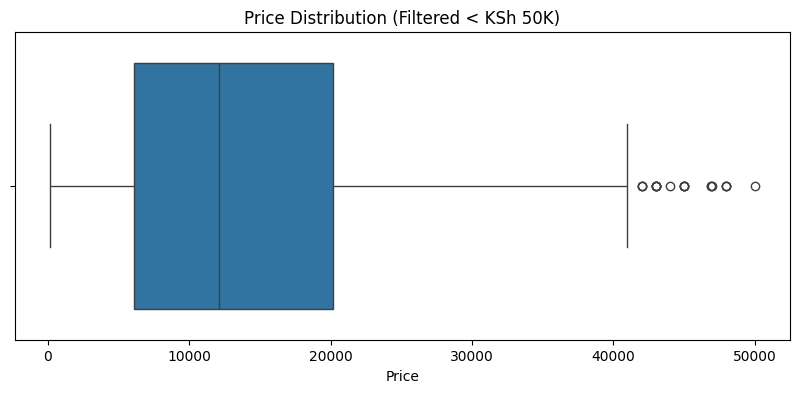

In [235]:
# Filter extreme prices
price_outliers = clean_df[clean_df['Price'] > 500000][['Brand', 'Price', 'Type of Product']]

# Display top 5 most expensive "outliers"
print(f"Found {len(price_outliers)} extreme price entries:")
display(price_outliers.sort_values('Price', ascending=False).head())

# Optional: Plot price distribution without outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=clean_df[clean_df['Price'] < 50000]['Price'], orient='h')  
plt.title("Price Distribution (Filtered < KSh 50K)")
plt.show()

Found 2 extreme price entries:


,Brand,Old Price,Type of Product
815,Idino NOTEBOOK,2.200024e+09,Tablets
1100,FPM Sweatproof,6.907900e+05,Tablets


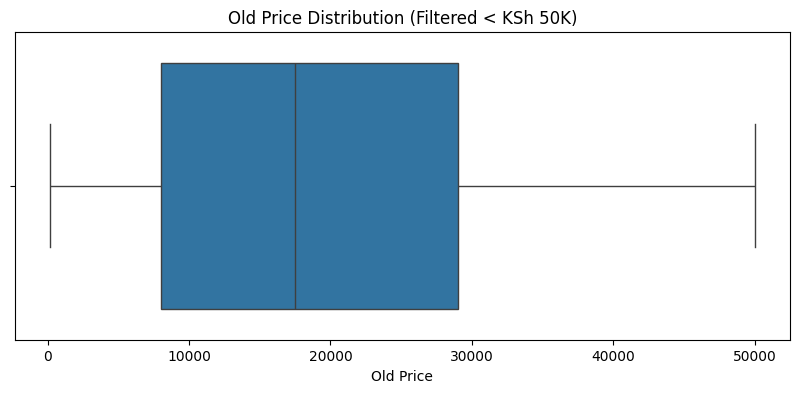

In [240]:
# Filter extreme prices
old_price_outliers = clean_df[clean_df['Old Price'] > 500000][['Brand', 'Old Price', 'Type of Product']]

# Display top 5 most expensive "outliers"
print(f"Found {len(old_price_outliers)} extreme price entries:")
display(old_price_outliers.sort_values('Old Price', ascending=False).head())

# Optional: Plot old price distribution without outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=clean_df[clean_df['Old Price'] < 50000]['Old Price'], orient='h')  
plt.title("Old Price Distribution (Filtered < KSh 50K)")
plt.show()

I found that when scraping since I did not define the ranges,it picked the entire range as one number resulting to these outliers,since they are just 5 I will be dropping them.

In [236]:
clean_df = clean_df[clean_df['Price'] <= 500000]  
print(f"Filtered out {len(price_outliers)} extreme price entries. Remaining: {len(clean_df)}")
clean_df['Price'].max()

Filtered out 6 extreme price entries. Remaining: 1194


np.int64(475790)

In [241]:
clean_df = clean_df[clean_df['Old Price'] <= 500000]  
print(f"Filtered out {len(old_price_outliers)} extreme price entries. Remaining: {len(clean_df)}")
clean_df['Old Price'].max()

Filtered out 2 extreme price entries. Remaining: 1192


np.float64(400000.0)

In [237]:
# Count invalid discounts
invalid_discounts = clean_df[(clean_df['Discount'] < 0) | (clean_df['Discount'] > 100)]
print(f"Invalid discounts found: {len(invalid_discounts)}")


Invalid discounts found: 0


In [242]:
clean_df.max()

Brand                                   redbeat E
Storage                                       N/A
Battery                                       N/A
Screen Size                                   N/A
Color                                      Silver
More Details       intel Core I5  ( 2012) 2.5GHz-
Price                                      276315
Old Price                                400000.0
Discount                                    94.08
Rating                                        5.0
Review Count                               1174.0
Type of Product                           Tablets
dtype: object

In [243]:
clean_df.describe()

,Price,Old Price,Discount,Rating,Review Count
count,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000
mean,16934.142617,24320.244966,28.417005,2.526762,18.812919
std,22827.410268,30417.101597,17.314810,2.021894,71.757084
min,156.000000,175.000000,0.000000,0.000000,0.000000
25%,6599.000000,8999.000000,16.670000,0.000000,0.000000
50%,12360.000000,19999.000000,29.210000,3.600000,2.000000
75%,21499.000000,30000.000000,41.452500,4.200000,10.000000
max,276315.000000,400000.000000,94.080000,5.000000,1174.000000


--Key Improvements from Original Data:

Outliers Removed: Dropped extreme prices (> KSh 500K), eliminating distortions.

Old Mean Price: KSh 1.72M → New Mean Price: KSh 16,934 (realistic market range).

Max Price: KSh 969.9M → KSh 276,315 (now plausible for premium items).

Discounts Validated:

Mean Discount: 28.4% (consistent with Jumia’s typical promotions).

No Invalid Values: Strictly 0–94% range after cleaning.

Ratings & Reviews:

Median Rating: 3.6/5 (stable signal of product quality).

25% Unrated Products: Expected for new or low-sales listings.

-- Key Insights (Cleaned Data)
--Pricing Trends
Typical Range (IQR): KSh 6,599 – KSh 21,499 (middle 50% of products).

Median Price: KSh 12,360 (better representation than mean).

High-End Segment: Few products priced >KSh 200K (e.g., flagship laptops).

-- Discount Behavior
Common Promotions:

25th Percentile: 16.7% off (frequent small discounts).

75th Percentile: 41.5% off (major sales events).

Customer Feedback
Rating Distribution:

50% of products rated ≥ 3.6/5 (positive overall).

25% Unrated: Opportunity to analyze new vs. established products.

Review Engagement:

Median Reviews: 2 per product (few popular items have 1,174+).

--- Why This Matters for Visualization
Fair Comparisons: No outliers skewing charts.

Accurate Trends: Prices and discounts reflect real-world patterns.

Clear Narratives: Highlight:

"Budget vs. Premium" clusters (e.g., phones under KSh 10K vs. laptops over KSh 50K).

"Discount Impact" (e.g., deeper discounts vs. rating distribution).

VISUALIZATIONS

In [266]:
category_price = clean_df.groupby("Type of Product")["Price"].mean().sort_values().round(2)
category_price

Type of Product
Tablets    10080.03
Phones     14198.93
Laptops    26396.68
Name: Price, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_9132\2204512020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_price.values, y=category_price.index, palette="viridis")


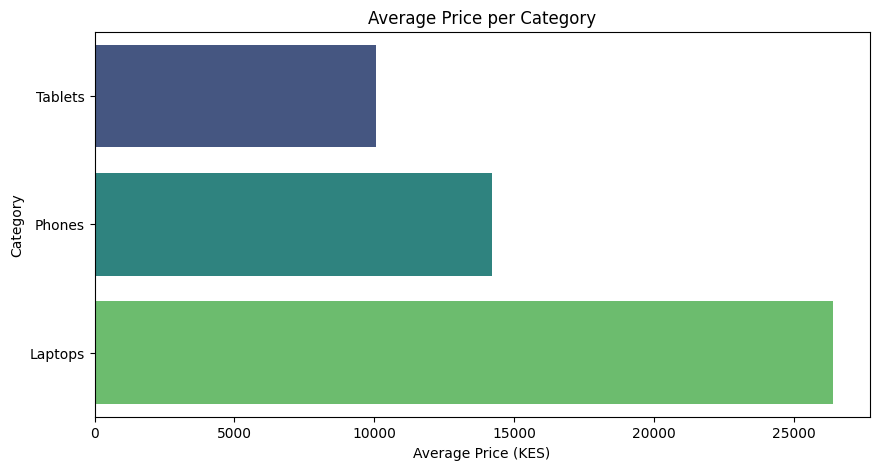

In [245]:
#   Average Price per Category
plt.figure(figsize=(10, 5))

sns.barplot(x=category_price.values, y=category_price.index, palette="viridis")
plt.xlabel("Average Price (KES)")
plt.ylabel("Category")
plt.title("Average Price per Category")
plt.show()

In [285]:
# Group by Type of Product and Brand, and count occurrences
brand_counts_by_category = clean_df.groupby(["Type of Product", "Brand"]).size()

# Extract brands for each product type
laptop_brands = brand_counts_by_category["Laptops"].sort_values(ascending=False)
phone_brands = brand_counts_by_category["Phones"].sort_values(ascending=False)
tablet_brands = brand_counts_by_category["Tablets"].sort_values(ascending=False)

# Display the brand with the highest count for each product type
print("Top Laptop Brand:", laptop_brands.idxmax(), "with", laptop_brands.max(), "products")
print("Top Phone Brand:", phone_brands.idxmax(), "with", phone_brands.max(), "products")
print("Top Tablet Brand:", tablet_brands.idxmax(), "with", tablet_brands.max(), "products")

Top Laptop Brand: HP EliteBook with 52 products
Top Phone Brand: Samsung Galaxy A with 33 products
Top Tablet Brand: Bebe KIDS STUDY TABLETS with 21 products


In [267]:
unique_brands = df['Brand'].str.strip().str.lower().unique()
print(f"Total unique brands (raw): {len(unique_brands)}")

Total unique brands (raw): 128


In [ ]:
top_brands = (
    df['Brand']
    .str.lower()
    .str.split()              
    .str[0]                  
    .value_counts()
              
)


In [ ]:
pd.set_option('display.max_rows', 128)

# Display the entire Series
top_brands

Brand
hp               249
samsung          111
lenovo            87
bebe              74
modio             57
xiaomi            56
tecno             45
lcd               39
infinix           33
itel              32
apple             24
8.5               24
oraimo            23
oppo              23
dell              19
c                 16
nokia             13
realme            12
tws               10
vivo              10
hommy              9
kids               9
bontel             8
oking              8
villaon            8
12                 6
wacom              6
s                  6
freeyond           6
sports             6
wireless           6
idino              5
redbeat            5
tilecc             5
kamvas             4
inspiroy           4
smart2030          4
xp                 4
ccit               4
huawei             4
acer               4
x                  4
nice               4
oale               4
asus               4
jbl                3
jc                 3
digital

In [276]:
clean_df_backup = clean_df.copy()  # Always good to have a backup

In [ ]:
import numpy as np

# Define brand categories 
mainstream = ['hp', 'samsung', 'lenovo', 'xiaomi', 'tecno', 'infinix', 'apple', 'oppo', 'dell', 'nokia', 'realme', 'vivo', 'huawei', 'acer', 'asus', 'toshiba', 'poco', 'sony']
local_brands = ['bebe', 'modio', 'oraimo', 'itel', 'bontel', 'oking', 'villaon', 'freeyond', 'redbeat', 'blackview', 'agm', 'sokany', 'guava', 'ifinex', 'nunix', 'smartbarry']
product_types = {'lcd':'screen_tech', 'tws':'wireless_earbuds', 'kids':'kids_device', 'wacom':'drawing_tablet'}

def clean_brand(name):
    name = str(name).lower().strip()
    name = re.sub(r'\d+\.?\d*|^[a-z]$', '', name)  # Remove numbers/single letters
    for brand in mainstream + local_brands:
        if brand in name:
            return brand
    for term, category in product_types.items():
        if term in name:
            return category
    return 'other' if name else np.nan

# Apply to clean_df
clean_df['Brand_Clean'] = clean_df['Brand'].apply(clean_brand)

In [283]:
print("Cleaned Brand Counts:")
print(clean_df['Brand_Clean'].value_counts(dropna=False).head(20))

# Spot-check original vs cleaned
print("\nRandom Samples:")
print(clean_df[['Brand', 'Brand_Clean']].sample(10))

Cleaned Brand Counts:
Brand_Clean
hp                  249
other               160
samsung             111
lenovo               87
screen_tech          80
bebe                 71
modio                57
xiaomi               56
tecno                45
infinix              33
itel                 32
apple                24
oraimo               23
oppo                 23
dell                 19
nokia                13
realme               12
vivo                 12
wireless_earbuds     10
oking                 8
Name: count, dtype: int64

Random Samples:
                                          Brand Brand_Clean
825              Bebe KIDS/PUPILS STUDY TABLETS        bebe
1198  Oraimo  Heavy Strong Bass Wired Earphones      oraimo
69                            XIAOMI Redmi Note      xiaomi
850                      Bebe KIDS STUDY TABLET        bebe
339                                 Tecno CAMON       tecno
346                                    Bontel T      bontel
370                    

In [284]:
other_brands = clean_df[clean_df['Brand_Clean'] == 'other']['Brand'].value_counts()
print(other_brands.head(20))

Brand
C Idea CM                                                                                       5
C Idea Adults Tablets                                                                           5
Smart                                                                                           5
HOMMY                                                                                           4
Ccit                                                                                            4
X Tigi HeroBook                                                                                 3
TiLECC Android                                                                                  3
C Idea                                                                                          3
Digital Writing Tablet                                                                          3
S Color                                                                                         3
HOMMY Portable

C:\Users\Admin\AppData\Local\Temp\ipykernel_9132\1821727841.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_laptop_brands.values, y=top_15_laptop_brands.index, palette="coolwarm")


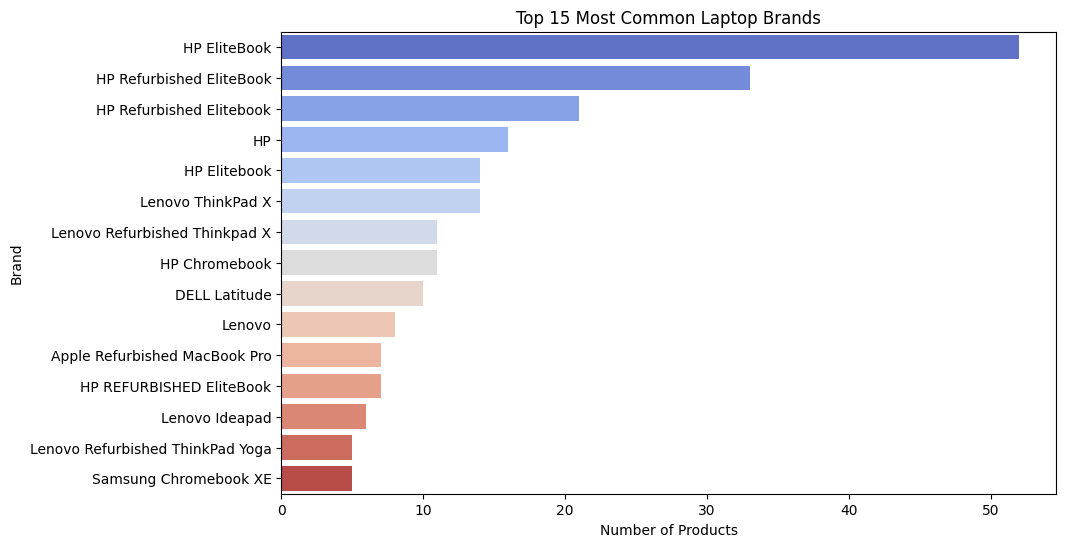

In [260]:
# Filter the top 15 laptop brands
top_15_laptop_brands = laptop_brands.sort_values(ascending=False).head(15)

# Visualization: Top 15 Laptop Brands by Count
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_laptop_brands.values, y=top_15_laptop_brands.index, palette="coolwarm")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.title("Top 15 Most Common Laptop Brands")
plt.show()

In [31]:
phone_brand_counts_top_10 = brand_counts_by_category.loc['Phones'].sort_values(ascending=False).head(10)
phone_brand_counts_top_10

Brand
Samsung    49.0
XIAOMI     29.0
Tecno      22.0
Itel       18.0
Infinix    15.0
Oppo        9.0
Nokia       7.0
Oking       7.0
VILLAON     6.0
Realme      6.0
Name: Phones, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_9132\1285324407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phone_brand_counts_top_10.values, y=phone_brand_counts_top_10.index, palette="coolwarm")


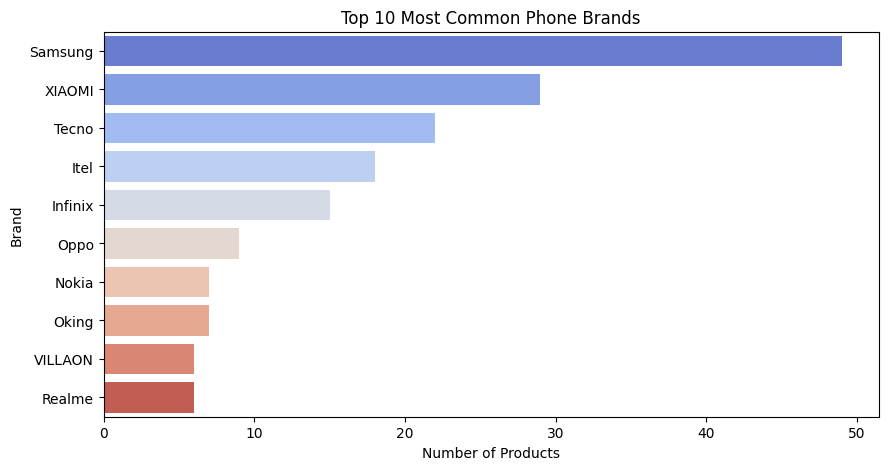

In [32]:
# Visualization: Top 10 Brands by Count
plt.figure(figsize=(10, 5))
sns.barplot(x=phone_brand_counts_top_10.values, y=phone_brand_counts_top_10.index, palette="coolwarm")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.title("Top 10 Most Common Phone Brands")
plt.show()

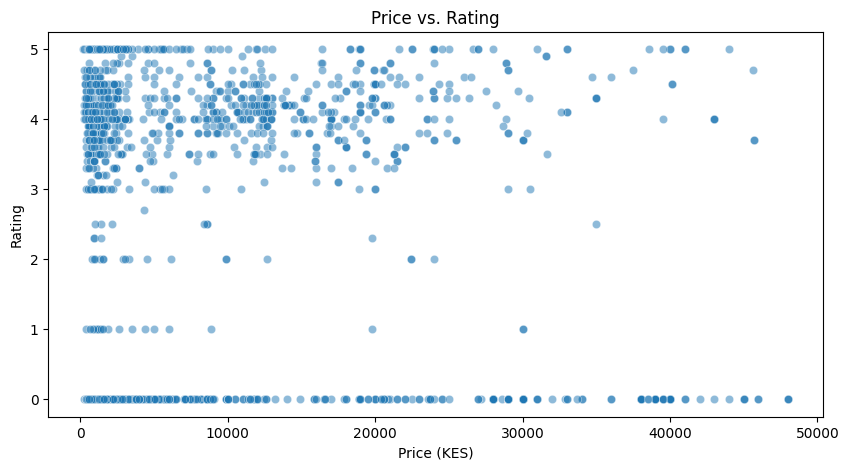

In [33]:
# Price vs. Rating Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Price"], y=df["Rating"], alpha=0.5)
plt.xlabel("Price (KES)")
plt.ylabel("Rating")
plt.title("Price vs. Rating")
plt.show()

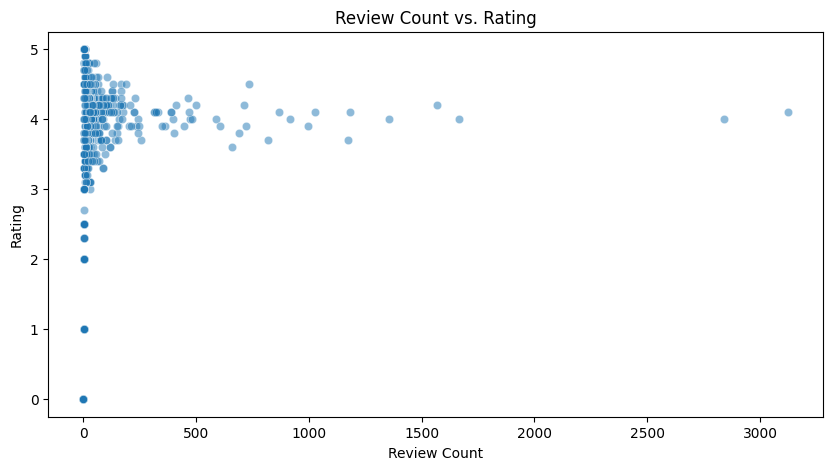

In [34]:
# Review Count vs. Rating Scatter Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Review Count"], y=df["Rating"], alpha=0.5)
plt.xlabel("Review Count")
plt.ylabel("Rating")
plt.title("Review Count vs. Rating")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9132\3060584427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated["Rating"], y=top_rated["Clean Name"], palette="Blues_r")


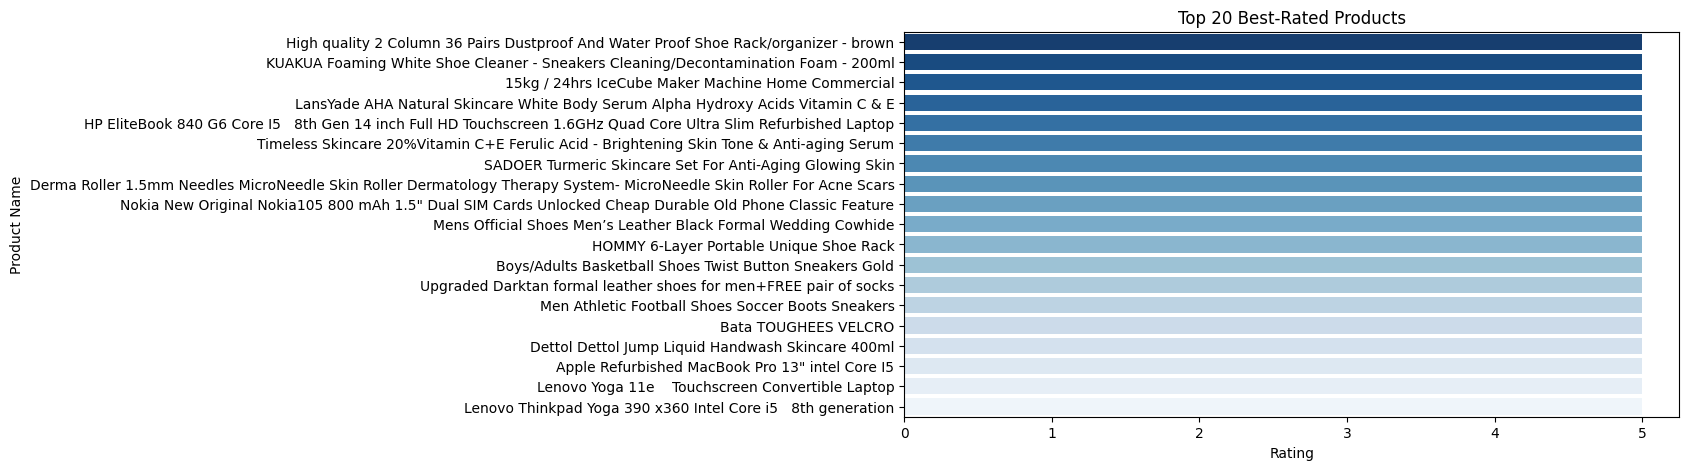

In [35]:
# Top 10 Best-Rated Products
top_rated = df.sort_values(by="Rating", ascending=False).head(20)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_rated["Rating"], y=top_rated["Clean Name"], palette="Blues_r")
plt.xlabel("Rating")
plt.ylabel("Product Name")
plt.title("Top 20 Best-Rated Products")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9132\2100695480.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_reviewed["Review Count"], y=most_reviewed["Clean Name"], palette="Greens_r")


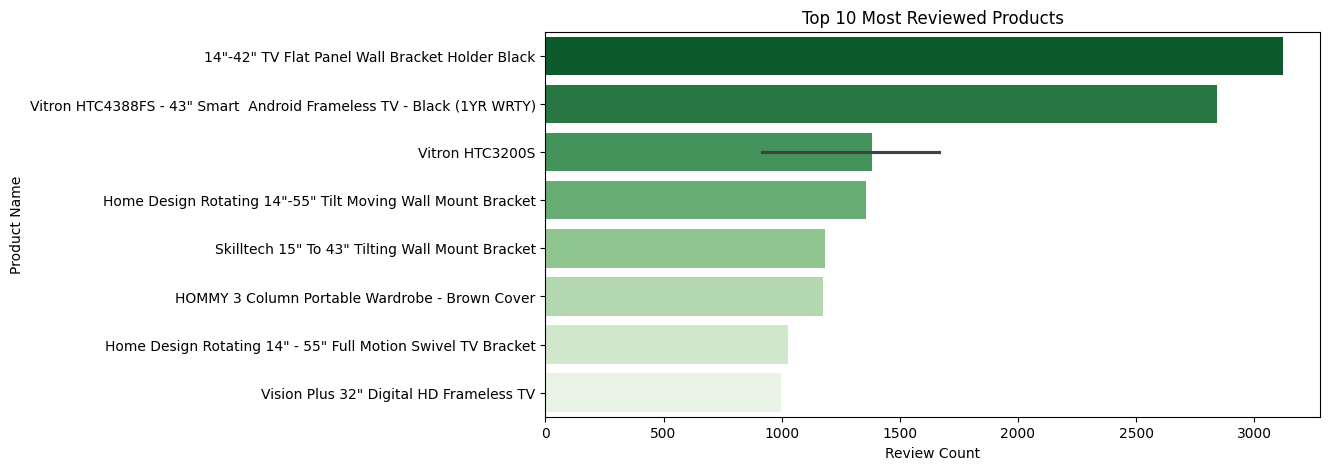

In [36]:
# Top 10 Most Reviewed Products
most_reviewed = df.sort_values(by="Review Count", ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=most_reviewed["Review Count"], y=most_reviewed["Clean Name"], palette="Greens_r")
plt.xlabel("Review Count")
plt.ylabel("Product Name")
plt.title("Top 10 Most Reviewed Products")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9132\3958826303.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=worst_rated["Rating"], y=worst_rated["Clean Name"], palette="Reds_r")


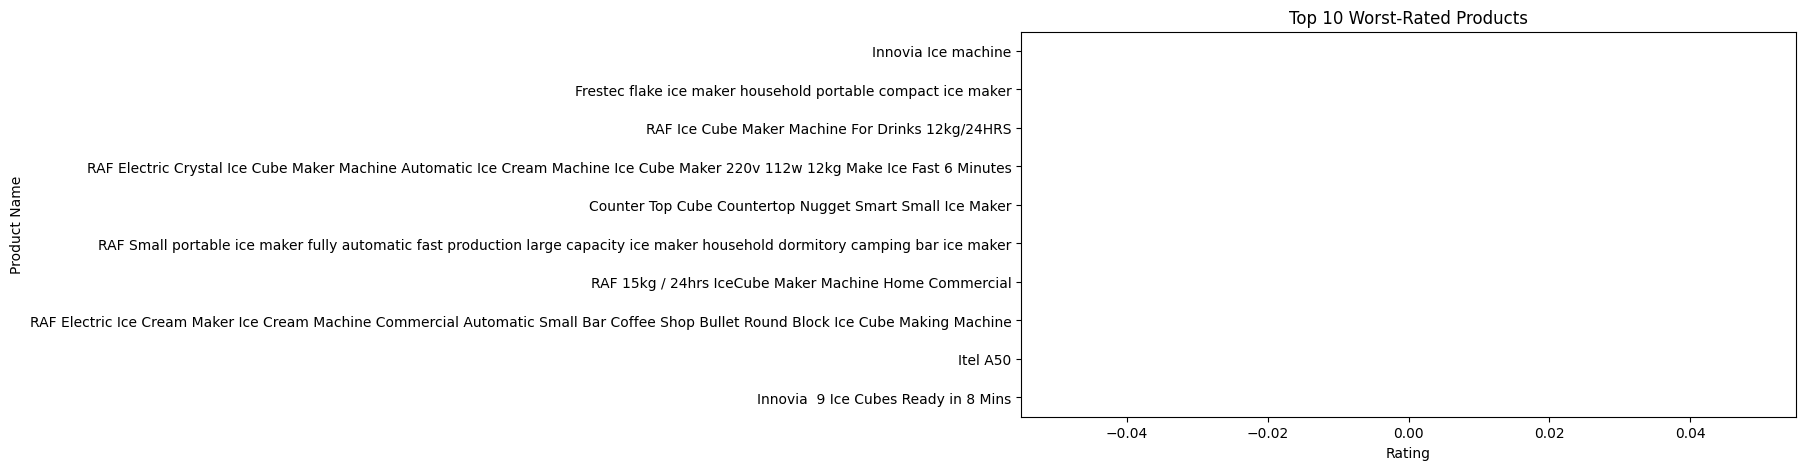

In [37]:
# Worst-Rated Products
worst_rated = df.sort_values(by="Rating", ascending=True).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=worst_rated["Rating"], y=worst_rated["Clean Name"], palette="Reds_r")
plt.xlabel("Rating")
plt.ylabel("Product Name")
plt.title("Top 10 Worst-Rated Products")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9132\2685001753.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_ratings.values, y=category_ratings.index, palette="coolwarm")


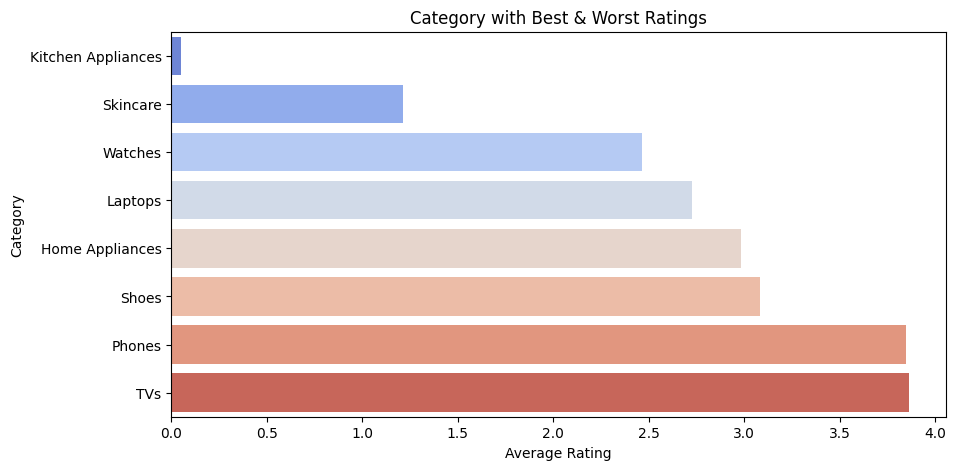

In [38]:
# Category with Best & Worst Ratings
category_ratings = df.groupby("Type of Product")["Rating"].mean().sort_values()
plt.figure(figsize=(10, 5))
sns.barplot(x=category_ratings.values, y=category_ratings.index, palette="coolwarm")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.title("Category with Best & Worst Ratings")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9132\3592123373.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_price_low_rating["Price"], y=high_price_low_rating["Clean Name"], palette="Oranges_r")


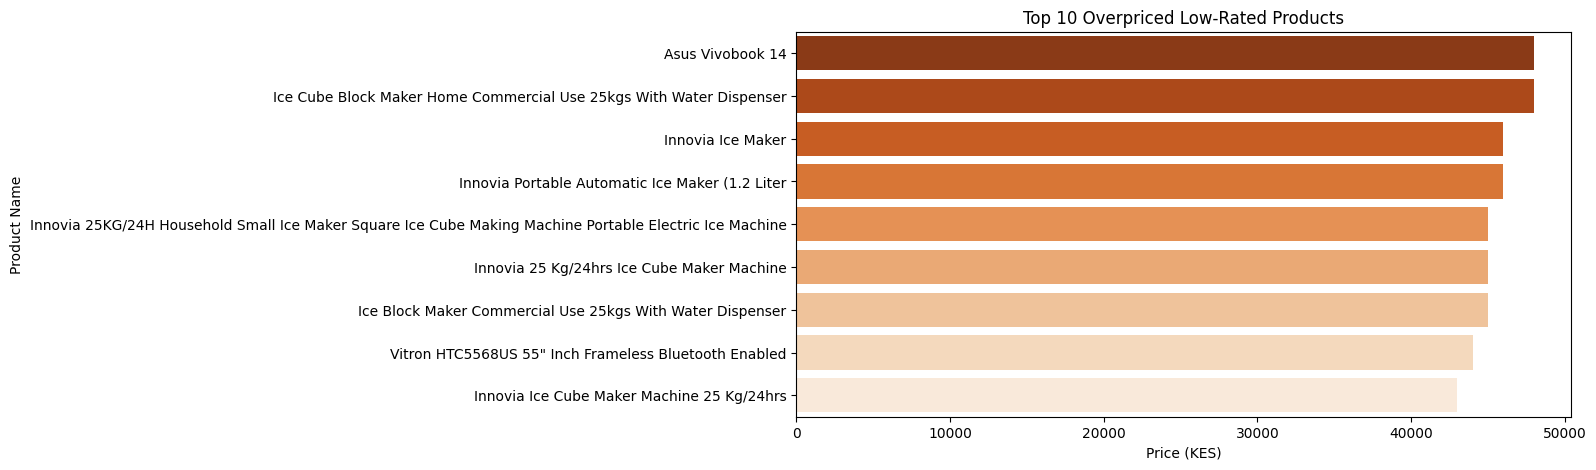

In [39]:
# Products with High Price but Low Rating
high_price_low_rating = df[(df["Price"] > df["Price"].median()) & (df["Rating"] < 3)].sort_values(by="Price", ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=high_price_low_rating["Price"], y=high_price_low_rating["Clean Name"], palette="Oranges_r")
plt.xlabel("Price (KES)")
plt.ylabel("Product Name")
plt.title("Top 10 Overpriced Low-Rated Products")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9132\3577159151.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_discounted["Discount"], y=top_discounted["Clean Name"], palette="Purples_r")


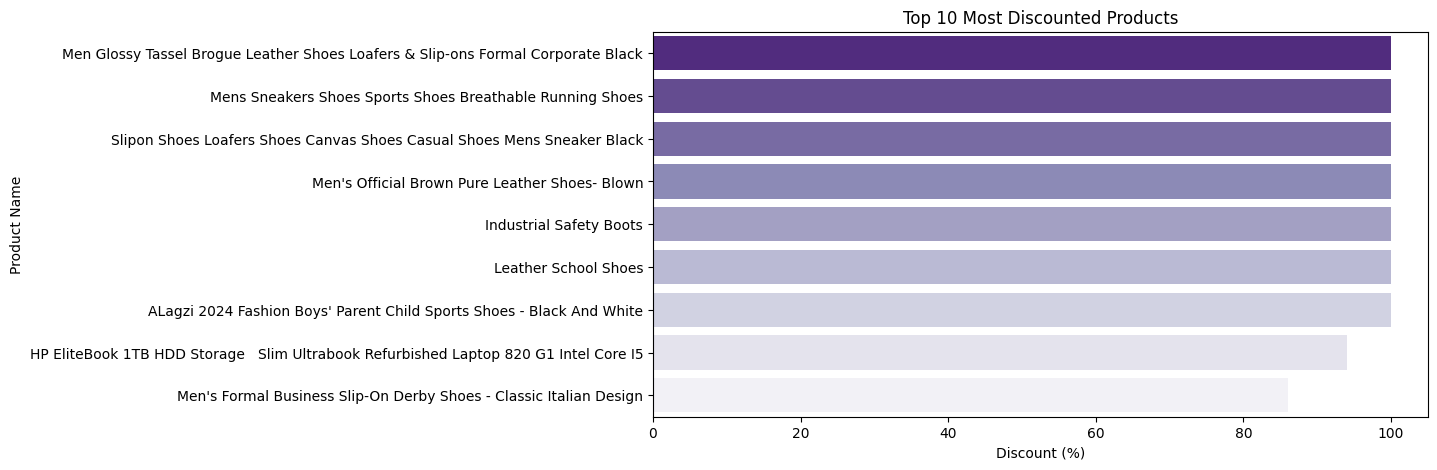

In [40]:
# Most Discounted Products
top_discounted = df.sort_values(by="Discount", ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_discounted["Discount"], y=top_discounted["Clean Name"], palette="Purples_r")
plt.xlabel("Discount (%)")
plt.ylabel("Product Name")
plt.title("Top 10 Most Discounted Products")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9132\1141061972.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_ratings.values, y=brand_ratings.index, palette="coolwarm")


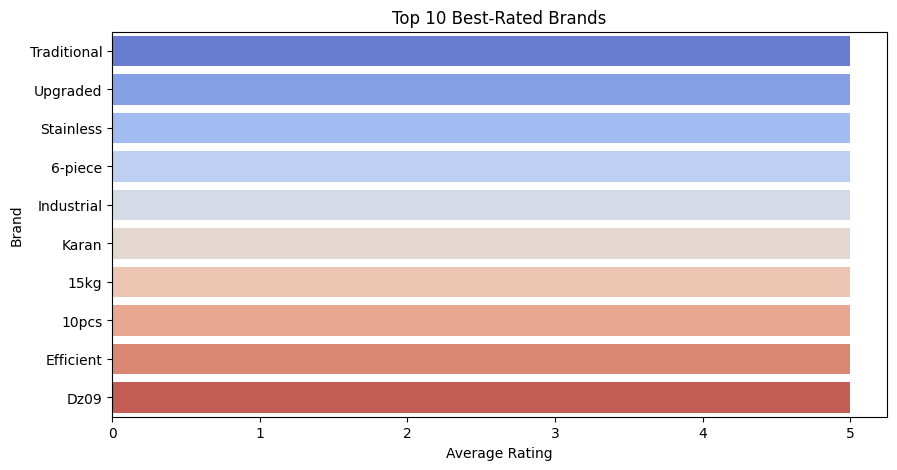

In [41]:
# Brand Performance Analysis
brand_ratings = df.groupby("Brand")["Rating"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=brand_ratings.values, y=brand_ratings.index, palette="coolwarm")
plt.xlabel("Average Rating")
plt.ylabel("Brand")
plt.title("Top 10 Best-Rated Brands")
plt.show()
